(idft-sinusoid)=
# Warm-up: a single sinusoid

In [1]:
%run ../setup.ipynb

When we defined the Discrete Fourier Transform (DFT) ({numref}`dft`), we saw that it exactly encodes the amplitude ($A$) and phase ($\phi$) of a sinusoidal input, at least when the frequency matches one of the analysis frequencies.
Specifically, we saw that (for $m \notin \{0, N/2\}$),

```{math}
\blue{x[n] = A\cdot \cos\left(2\pi \cdot \frac{m}{N}\cdot n + \phi \right)} \quad \Rightarrow \quad
\darkblue{X[m] = A \cdot \frac{N}{2} \cdot e^{\mathrm{j}\cdot \phi}}.
```

Of course, this doesn't tell us much if $\blue{x[n]}$ is *not* of that particular given form.
The DFT is still well defined, even if $\blue{x[n]}$ is a completely arbitrary set of sample values:

```{math}
\darkblue{X[m]} = \sum_{n=0}^{N-1} \blue{x[n]} \cdot \purple{e^{-2\pi\cdot\mathrm{j}\cdot m\cdot n / N}}
```

This raises the question: how do we interpret the coefficients $\darkblue{X[m]}$ for arbitrary signals $\blue{x[n]}$?
We'll answer this by showing that there exists an *inverse* DFT, which can reconstruct the input signal $\blue{x[n]}$ exactly from only its DFT coefficients $\darkblue{X[m]}$.

## Recovering a sinusoid

Before defining the full inverse DFT, let's first try to recover a single sinusoid from its DFT spectrum.

Recall from {numref}`example-sinusoids` that a sinusoid at an analysis frequency index $m$ will have two non-zero DFT coefficients: $\darkblue{X[m]}$ and $\darkblue{X[N-m]}$, which are complex conjugates of each other: their real parts are the same, and their imaginary parts are opposite:

\begin{align*}
\darkblue{X[m]} &= A \cdot \frac{N}{2} \cdot e^{\mathrm{j}\cdot \phi}\\
\darkblue{X[N-m]} &= A \cdot \frac{N}{2} \cdot e^{-\mathrm{j}\cdot \phi}
\end{align*}

Each of these components can be used to produce a complex sinusoid $z_m[n]$ as follows:

\begin{align*}
z_m[n] &= \darkblue{X[m]} \cdot e^{2\pi \cdot \mathrm{j} \cdot \frac{m}{N} \cdot n}\\
&= A \cdot \frac{N}{2} \cdot e^{\mathrm{j}\cdot \phi} \cdot e^{2\pi \cdot \mathrm{j} \cdot \frac{m}{N} \cdot n}\\
&= A \cdot \frac{N}{2} \cdot e^{\mathrm{j}\cdot \left(2\pi \cdot \frac{m}{N} \cdot n + \phi\right)}
\end{align*}

This is demonstrated visually in {numref}`recons`.

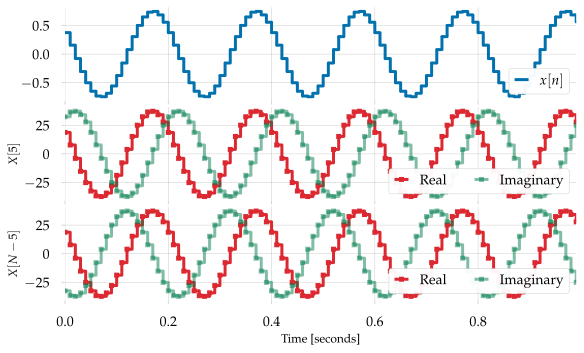

In [3]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=figaspect(0.6))

fs = 100
N = fs
f0 = 5 * fs / N
phi = np.pi / 3
t = np.arange(N) / fs
A = 0.75
x = A * np.cos(2 * np.pi * f0 * t + phi)

X = np.fft.fft(x)

X1 = np.zeros_like(X)
X1[5] = X[5]
x1 = np.fft.ifft(X1) * N

X2 = np.zeros_like(X)
X2[-5] = X[-5]
x2 = np.fft.ifft(X2) * N

freqs = np.fft.fftfreq(N, d=1/fs)

ax0.step(t, x, marker='.', where='post', label='$x[n]$')
ax0.legend(loc='lower right')
ax1.step(t, x1.real, marker='s', where='post', color=colors[1], label='Real')
ax1.step(t, x1.imag, marker='s', where='post', alpha=0.5, color=colors[5], label='Imaginary')
ax1.legend(loc='lower right', ncol=2)
ax1.set_ylabel('$X[5]$')
ax2.step(t, x2.real, marker='s', where='post', color=colors[1], label='Real')
ax2.step(t, x2.imag, marker='s', where='post', alpha=0.5, color=colors[5], label='Imaginary')
ax2.set_ylabel('$X[N-5]$')
ax2.set_xlabel('Time [seconds]')
ax2.legend(loc='lower right', ncol=2)

glue('recons', fig, display=False)

```{glue:figure} recons
---
name: recons
---

*Top*: a sinusoid $\blue{x[n] = 0.75 \cdot \cos(2\pi \cdot 5 \cdot \frac{n}{N} + \frac{\pi}{3})}$ with $N = f_s = 100$.
*Middle*: the complex sinusoid corresponding to $\darkblue{X[5]}$ (real and imaginary portions shown separately).
*Bottom*: the complex sinusoid corresponding to $\darkblue{X[N-5]}$.  For complex sinusoids, the real and imaginary parts are plotted separately.
```

Because the imaginary parts of $\darkblue{X[m]}$ and $\darkblue{X[N-m]}$ are opposite ($\darkblue{X[m] = \overline{X[N-m]}}$), summing the two doubles the real part and cancels the imaginary part, and we'll be left with a cosine wave at the appropriate phase:

```{math}
z_m[n] + z_{N-m}[n] = A \cdot N \cdot \red{\cos\left(2\pi \cdot \frac{m}{N} \cdot n + \phi \right)}\\
```

This is exactly what we started with ($\blue{x[n]}$), except there's an additional scaling of $N$ in front.
So, for at least this simple case of a single sinusoid, we can recover the input signal by generating the corresponding sinusoids with the parameters encoded by the magnitude and phase in the DFT, and dividing out the length of the signal $N$.


As we'll see in the next section, this strategy works in general: we don't need to assume that $\blue{x[n]}$ is a single sinusoid!